In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:

"""Breast Cancer Wisconsin (Diagnostic): 
"""
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name="class")


In [3]:

print("\nFeautures:")
print(X.columns)


Feautures:
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [4]:

print("Target:")
print(y.value_counts())

Target:
class
1    357
0    212
Name: count, dtype: int64


In [5]:


## Train/test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify =y)

In [ ]:
## Base/'weak' learner: Decision tree

tree = DecisionTreeClassifier(random_state=24)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

## Accuracy score
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {acc_tree:.4f}")


Decision Tree Accuracy: 0.8947


In [7]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    bootstrap=True,      # resample with replacement
    max_samples=1.0,     # same number of samples as training set
    random_state=24
)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)


acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Bagging Accuracy: {acc_bag:.4f}")

Bagging Accuracy: 0.9357


/tmp/ipykernel_36441/3117685868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")


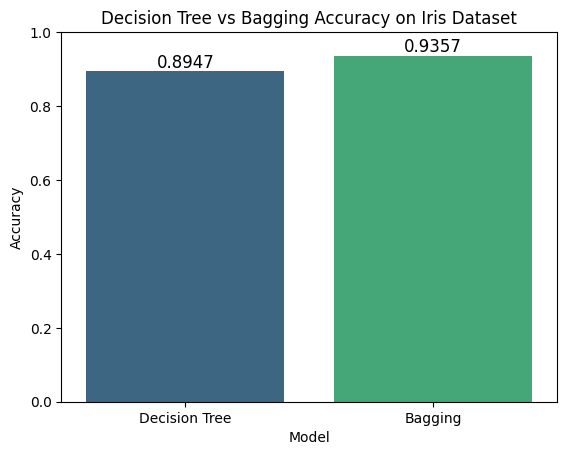

In [ ]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Bagging"],
    "Accuracy": [acc_tree, acc_bag]
})
sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")
plt.ylim(0, 1)
plt.title("Decision Tree vs Bagging Accuracy on Breast Cancer Dataset")
for i, val in enumerate(results["Accuracy"]):
    plt.text(i, val + 0.01, f"{val:.4f}", ha="center", fontsize=12)
plt.show()